<a href="https://colab.research.google.com/github/megharajs07/Dav3/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Walmart - Confidence Interval and CLT

## About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


## About data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: [Walmart_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

## Step by Step process on a highlevel


1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
3. Do some data exploration steps like:
- Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
- Inference after computing the average female and male expenses.
- Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
- The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
6. Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
7. Give recommendations and action items to Walmart.

### Import Dataset - prelimanary checks

In [ ]:
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv

--2025-04-23 10:46:33--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.94, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M   129MB/s    in 0.2s    

2025-04-23 10:46:33 (129 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("walmart_data.csv") # Read data to Dataframe

In [ ]:
# Shape of the dataframe
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'User_ID': [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique values in 'Product_ID': ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique values in 'Gender': ['F' 'M']
Unique values in 'Age': ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values in 'Occupation': [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in 'City_Category': ['A' 'C' 'B']
Unique values in 'Stay_In_Current_City_Years': ['2' '4+' '3' '1' '0']
Unique values in 'Marital_Status': [0 1]
Unique values in 'Product_Category': [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in 'Purchase': [ 8370 15200  1422 ...   135   123   613]


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


**Insights 1: **
1. From the above basic analysis we see that there are total 10 columns in data set
2. There are no Nulls in any of the columns
3. Apart from Purchase columns all other columns looks like categorical

In [ ]:
# Convert Columns to Categorical (except Purchase)

for _ in df.columns[:-1]:
  df[_] = df[_].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include = 'category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


**Insights 2: **
1. The table shows that there are `5891` unique users, with the user having `U_ID` `1001680` making the highest number of purchases — `1026` transactions.

2. There are `3631` unique products, and the product with `Product_ID` `P00265242` has the highest demand, with `1880` purchases.

3. In terms of gender, male customers account for the majority of purchases, contributing to approximately 75% of the total transactions.

4. There are 7 distinct age groups, with the `26–35` age group making the most purchases — contributing to nearly 40% of all transactions.

5. Approximately 59% of transactions were made by `unmarried` customers, while 41% were made by `married` customers.

### Outlier detection

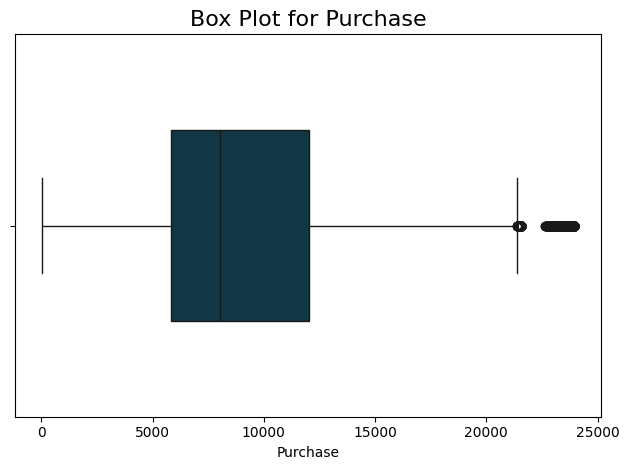

<Figure size 1920x1080 with 0 Axes>

In [ ]:
# Create box plot for Purchase
sns.boxplot(x='Purchase', data=df, color ='#073b4c', width=0.5)
plt.title("Box Plot for Purchase", fontsize=16)
plt.tight_layout()
plt.figure(figsize=(19.2,10.80))
plt.show()

In [ ]:
219587/550068

0.39919973530545316